## **Predicting Loan Default Risk Using Financial Data**

### **Import Librairies**

In [52]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import KMeansSMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### **Import data**

In [2]:
loan_risk_df = pd.read_csv("C:/Users/niibo/Downloads/Python-Data-Analysis-Projects-Package/Python Data Analysis Projects Package/Project 8/loan_default_risk_data.csv")

In [26]:
loan_risk_df.head()

,age,income,loan_amount,credit_score,employment_status,marital_status,education_level,loan_term,loan_purpose,default
0,56,22695,44353,697,Unemployed,Divorced,Master,12,Car,1
1,46,68190,22675,576,Employed,Single,Bachelor,24,Car,0
2,32,25258,49417,803,Employed,Divorced,Master,12,Education,0
3,60,107538,28938,691,Employed,Single,PhD,12,Home,0
4,25,59504,28664,434,Unemployed,Single,High School,12,Home,1


### **Metadata of data**

In [3]:
print("No of columns: ", loan_risk_df.shape[0])
print("No of rows: ", loan_risk_df.shape[1])

No of columns:  100
No of rows:  10


### **Cleaning of data**

In [5]:
# Check for missing values
missing_values = loan_risk_df.isnull().sum()
print("missing Values: ")
missing_values

missing Values: 


age                  0
income               0
loan_amount          0
credit_score         0
employment_status    0
marital_status       0
education_level      0
loan_term            0
loan_purpose         0
default              0
dtype: int64

In [6]:
# Check the assigned datatype
loan_risk_df.dtypes

age                   int64
income                int64
loan_amount           int64
credit_score          int64
employment_status    object
marital_status       object
education_level      object
loan_term             int64
loan_purpose         object
default               int64
dtype: object

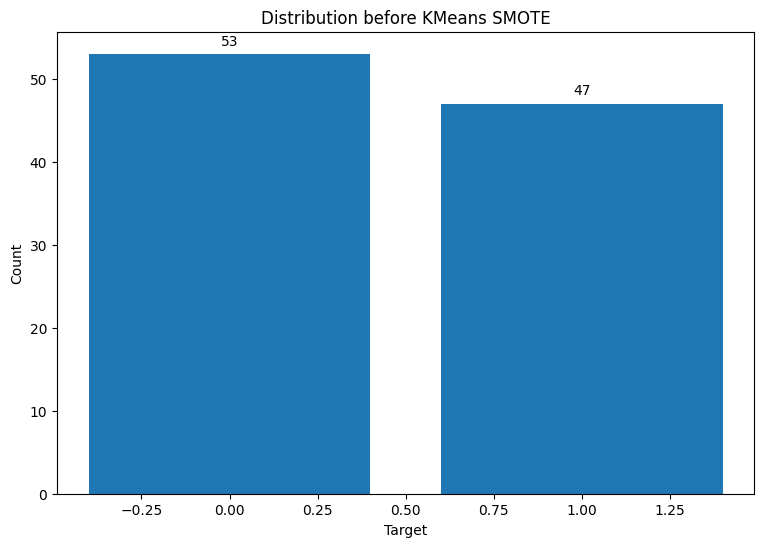

In [17]:
# Address the default class by using any under or over sampling technique
# Use of the Kmeans SMOTE Oversampling technique

x = loan_risk_df.drop('default', axis = 1)
y = loan_risk_df['default']
target = loan_risk_df['default'].value_counts()

plt.figure(figsize = (9, 6))
plt.bar(target.index, target.values)
plt.title('Distribution before KMeans SMOTE')
plt.ylabel('Count')
plt.xlabel('Target')
for i, v in enumerate(target.values):
    plt.text(i, v + 0.02*max(target.values), str(v), ha = 'center')
plt.show()

In [21]:
# must one-hot encode the categorical columns before applying KMeans SMOTE
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)
x_resampled, y_resampled = kmeans_smote.fit_resample(x_encoded, y)


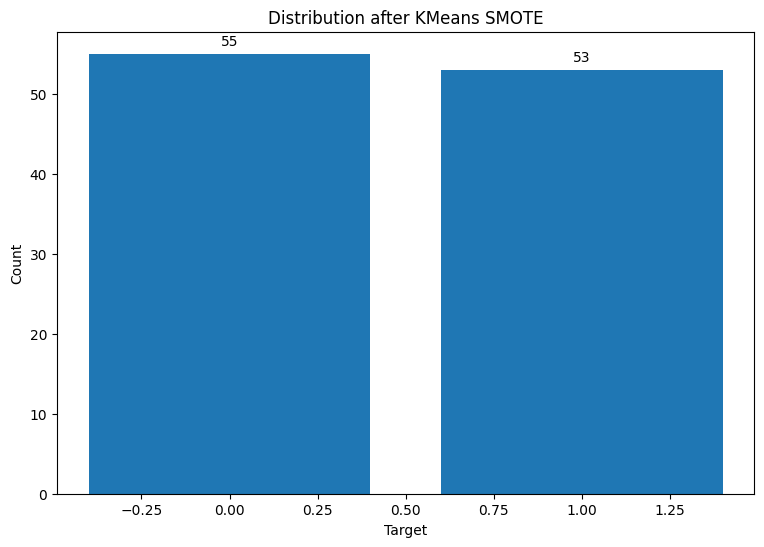

In [25]:
# Visualize the balanced dataset
plt.figure(figsize = (9, 6))
plt.bar(target.index, pd.Series(y_resampled).value_counts())
plt.title('Distribution after KMeans SMOTE')
plt.ylabel('Count')
plt.xlabel('Target')
for i, v in enumerate(pd.Series(y_resampled.value_counts())):
    plt.text(i, v + 0.02*max(pd.Series(y_resampled.value_counts())), str(v), ha = 'center')
plt.show()

## **Feature Engineering and Selection**

In [27]:
# Analyze the features to identify the most significant ones for loan default prediction
X = loan_risk_df[['income', 'loan_amount', 'credit_score', 'employment_status', 'loan_purpose', 'loan_term','education_level',
                  'age', 'marital_status']]
Y = loan_risk_df[['income', 'loan_amount', 'credit_score', 'employment_status', 'loan_purpose', 'loan_term']]

In [30]:
# Encode categorical variables using techniques like one-hot encoding or label encoder
label = LabelEncoder()
loan_risk_df['employment_status'] = label.fit_transform(loan_risk_df['employment_status'])
loan_risk_df['loan_purpose'] = label.fit_transform(loan_risk_df['loan_purpose'])
loan_risk_df['education_level'] = label.fit_transform(loan_risk_df['education_level'])
loan_risk_df['marital_status'] = label.fit_transform(loan_risk_df['marital_status'])

In [31]:
loan_risk_df.head()

,age,income,loan_amount,credit_score,employment_status,marital_status,education_level,loan_term,loan_purpose,default
0,56,22695,44353,697,1,0,2,12,0,1
1,46,68190,22675,576,0,2,0,24,0,0
2,32,25258,49417,803,0,0,2,12,1,0
3,60,107538,28938,691,0,2,3,12,2,0
4,25,59504,28664,434,1,2,1,12,2,1


In [33]:
#  standardize numerical features like income, loan amount, and credit score for better model performance. 
scaler = StandardScaler()
scaled = scaler.fit_transform(loan_risk_df[['income', 'loan_amount', 'credit_score']])


## **Exploratory Data Analysis (EDA)**

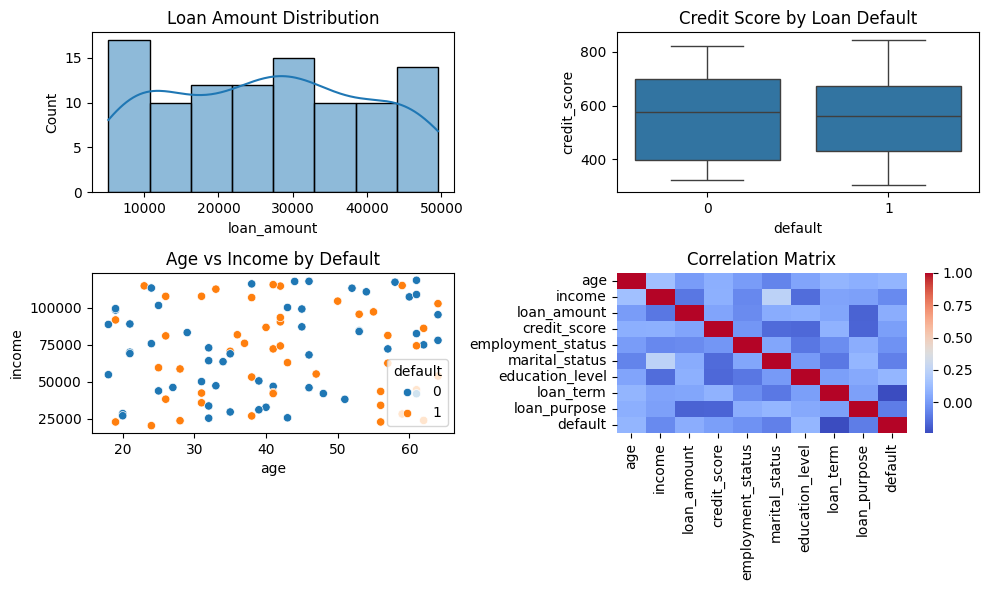

In [39]:
# Visualize the data using histograms, box plots, and scatter plots to identify patterns and relationships between features.
# scatter plot between loan term and credit score

plt.figure(figsize = (10, 6))

# Histogram of loan amounts
plt.subplot(2, 2, 1)
sns.histplot(loan_risk_df['loan_amount'], kde=True)
plt.title('Loan Amount Distribution')

# Boxplot of credit score
plt.subplot(2, 2, 2)
sns.boxplot(x='default', y='credit_score', data=loan_risk_df)
plt.title('Credit Score by Loan Default')

# Scatter plot for age vs income
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='income', hue='default', data=loan_risk_df)
plt.title('Age vs Income by Default')

# Correlation heatmap
plt.subplot(2, 2, 4)
sns.heatmap(loan_risk_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

## **Model Selection and Training**

In [44]:
loan_risk_df.head()

,age,income,loan_amount,credit_score,employment_status,marital_status,education_level,loan_term,loan_purpose,default
0,56,22695,44353,697,1,0,2,12,0,1
1,46,68190,22675,576,0,2,0,24,0,0
2,32,25258,49417,803,0,0,2,12,1,0
3,60,107538,28938,691,0,2,3,12,2,0
4,25,59504,28664,434,1,2,1,12,2,1


In [50]:
# Split the data into training and testing sets 
x_test, x_train, y_test, y_train = train_test_split(x_encoded, y, test_size = 0.2, random_state = 42)

In [55]:
# Experiment with different classification models such as Logistic Regression, Decision Trees, Random Forests, and SVC.
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machines': SVC()
}

for name, model in models.items():
    
    # Train model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Evaluation for each model
    print(f"\n{name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    
    # Cross-validation
    cv_scores = cross_val_score(model, x_resampled, y_resampled, cv=5)
    print("Cross-validation accuracy:", np.mean(cv_scores))



Logistic Regression Model Evaluation:
Accuracy: 0.525
Precision: 0.4883720930232558
Recall: 0.5675675675675675
F1 Score: 0.525
ROC-AUC: 0.5279698302954117
Cross-validation accuracy: 0.7316017316017316

Random Forest Model Evaluation:
Accuracy: 0.575
Precision: 0.5428571428571428
Recall: 0.5135135135135135
F1 Score: 0.5277777777777778
ROC-AUC: 0.5707102451288498
Cross-validation accuracy: 0.6571428571428571

Decision Tree Model Evaluation:
Accuracy: 0.4625
Precision: 0.4482758620689655
Recall: 0.7027027027027027
F1 Score: 0.5473684210526316
ROC-AUC: 0.4792583280955374
Cross-validation accuracy: 0.7038961038961038

Support Vector Machines Model Evaluation:
Accuracy: 0.5
Precision: 0.46938775510204084
Recall: 0.6216216216216216
F1 Score: 0.5348837209302325
ROC-AUC: 0.5084852294154619
Cross-validation accuracy: 0.7034632034632035
